$$ \beta_{i + 1} =\ \beta_i + (J_i^T \cdot J_i)^{-1} \cdot J_i^T \cdot r_i $$
$$ J = \begin{pmatrix} \dfrac{\partial{f_1}}{\partial{\beta_1}} & \ldots & \dfrac{\partial{f_1}}{\partial{\beta_p}} \\ \vdots & \ddots & \vdots \\
 \dfrac{\partial{f_n}}{\partial{\beta_1}} & \ldots &\dfrac{\partial{f_n}}{\partial{\beta_p}}
 \end{pmatrix}, ~ r = \begin{pmatrix} r_1 \\ \vdots \\ r_n \end{pmatrix}, ~ f_i = f(x_i, \beta)
$$

Result: [0.09361914 0.01463807]
Loss value: 380.68910242331


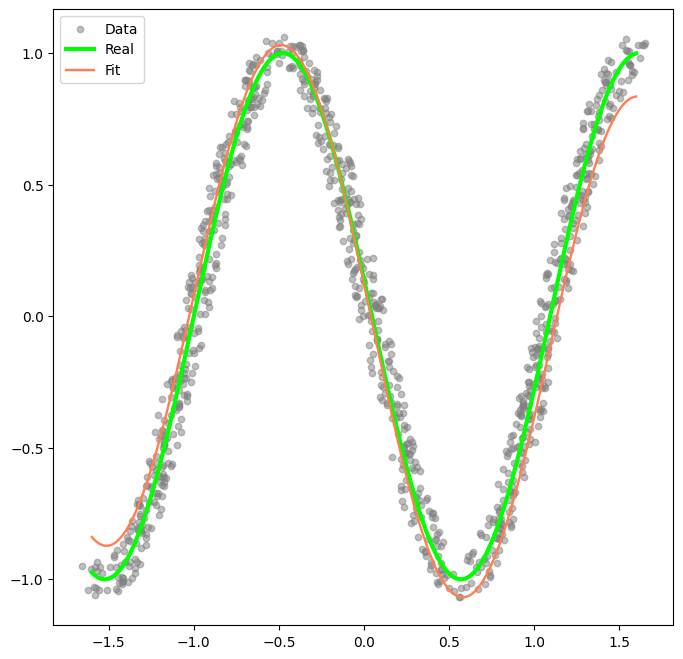

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from dataset_generator import Generator
import math


def gauss_newton(X, Y, initial_w, func, jacobian_func, max_iter=1000, tol=1e-5):
    w = initial_w
    n, m = len(X), len(w)

    for i in range(max_iter):
        r = np.array([(y - func(x, w)) for x, y in zip(X, Y)])
        jacobian = np.zeros((n, m))
        jacobian_func(func, X, w, jacobian)
        jacobian_t = jacobian.T
        w = w + np.linalg.inv(jacobian_t @ jacobian) @ jacobian_t @ r

    return w


def f(x, w):
    try:
        return_value = math.sin(w[0] * x + w[1])
        return return_value
    except:
        print(f'ERROR CAUGHT. x: {x}\nw: {w}')
        exit()


def grad(f, x, w, ans, delta=1e-9):
    n = len(w)
    wd = np.copy(w)

    for i in range(n):
        wd[i] += delta
        ans[i] = np.divide(f(x, wd) - f(x, w), delta)
        wd[i] -= delta


def jacobian_func(f, x, w, jacobian):
    for i in range(len(jacobian)):
        grad(f, x[i], w, jacobian[i])


def loss(Dataset_X, Dataset_Y, w, f):
    return sum(np.array([(y - f(x, w)) for x, y in zip(Dataset_X, Dataset_Y)]) ** 2)


# Generate synthetic data.
# PARAMETERS
density = 8000
dots_count = 1000
variance = 0.075
dist = 1.6
weights = np.array([3, 3])
# ===========

gen = Generator(f)
X, Y, Dataset_X, Dataset_Y = gen.generate(dots_count, dist, density, variance, weights)

# Apply Gauss-Newton method.
initial_w = np.zeros(len(weights))
max_iter = 1000
p_est = gauss_newton(Dataset_X, Dataset_Y, initial_w, f, jacobian_func, max_iter=max_iter)

# Plot the result.

# Plot style:
plt.style.use('default')
_ = plt.figure(figsize=(8, 8))
# ===========

print(f"Result: {p_est}")
print(f'Loss value: {loss(Dataset_X, Dataset_Y, p_est, f)}')

plt.scatter(Dataset_X, Dataset_Y, label='Data', color='gray', alpha=0.5, s=20.8, antialiased=True)
plt.plot(X, Y, label='Real', color='lime', antialiased=True, linewidth=3)
plt.plot(X, [(y - f(x, p_est)) for x, y in zip(X, Y)], label='Fit', color='coral', antialiased=True, linewidth=1.7)
plt.legend()
plt.show()